In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data

data = pd.read_csv("E4.txt", sep=" ", header=None, names=["features","time", "values"])

In [5]:
data.head(10)

,features,time,values
0,R,device_connect,OK
1,R,device_subscribe,bat
2,R,device_subscribe,tag
3,R,device_subscribe,ibi
4,R,device_subscribe,tmp
5,R,device_subscribe,gsr
6,R,device_subscribe,acc
7,E4_Acc,"1649405360,5891",-59
8,E4_Acc,"1649405360,62035",-61
9,E4_Acc,"1649405360,6516",-61


In [6]:
# remove string values

data.drop(data[data["features"].str.contains("R")].index,inplace = True)
data.head(10)

,features,time,values
7,E4_Acc,"1649405360,5891",-59
8,E4_Acc,"1649405360,62035",-61
9,E4_Acc,"1649405360,6516",-61
10,E4_Acc,"1649405360,68285",-62
11,E4_Acc,"1649405360,7141",-64
12,E4_Acc,"1649405360,74535",-62
13,E4_Acc,"1649405360,80786",-62
14,E4_Acc,"1649405360,83911",-65
15,E4_Acc,"1649405360,90161",-56
16,E4_Acc,"1649405360,93286",-57


In [7]:
df = data.copy()

# to convert to date time without problems

df['time'] = data['time'].str.replace(',', '.')
df['values'] = data['values'].str.replace(',', '.')

In [8]:
df.head(10)

,features,time,values
7,E4_Acc,1649405360.5891,-59
8,E4_Acc,1649405360.62035,-61
9,E4_Acc,1649405360.6516,-61
10,E4_Acc,1649405360.68285,-62
11,E4_Acc,1649405360.7141,-64
12,E4_Acc,1649405360.74535,-62
13,E4_Acc,1649405360.80786,-62
14,E4_Acc,1649405360.83911,-65
15,E4_Acc,1649405360.90161,-56
16,E4_Acc,1649405360.93286,-57


In [9]:
# convert date time

df['time'] = pd.to_datetime(df['time'], unit='s')
df.head(10)

,features,time,values
7,E4_Acc,2022-04-08 08:09:20.589099884,-59
8,E4_Acc,2022-04-08 08:09:20.620349884,-61
9,E4_Acc,2022-04-08 08:09:20.651599884,-61
10,E4_Acc,2022-04-08 08:09:20.682849884,-62
11,E4_Acc,2022-04-08 08:09:20.714099884,-64
12,E4_Acc,2022-04-08 08:09:20.745349884,-62
13,E4_Acc,2022-04-08 08:09:20.807859898,-62
14,E4_Acc,2022-04-08 08:09:20.839109898,-65
15,E4_Acc,2022-04-08 08:09:20.901609898,-56
16,E4_Acc,2022-04-08 08:09:20.932859898,-57


In [10]:
# select features

dt = df[df.features.isin(['E4_Bvp', 'E4_Temperature', 'E4_Gsr'])]
dt.head(10)

,features,time,values
25,E4_Gsr,2022-04-08 08:09:19.765000105,13.50844
26,E4_Gsr,2022-04-08 08:09:20.015000105,13.51612
27,E4_Gsr,2022-04-08 08:09:20.515000105,13.54046
28,E4_Gsr,2022-04-08 08:09:20.765000105,13.52637
29,E4_Gsr,2022-04-08 08:09:21.015000105,13.52637
30,E4_Gsr,2022-04-08 08:09:20.265000105,13.51741
32,E4_Temperature,2022-04-08 08:09:19.552720070,31.37
33,E4_Temperature,2022-04-08 08:09:20.302759886,31.37
34,E4_Temperature,2022-04-08 08:09:21.302799940,31.39
35,E4_Temperature,2022-04-08 08:09:19.802730083,31.37


In [11]:
dt = dt.sort_values(by = 'time',ascending = True)
dt = dt.set_index('time')
dt.head(10)

,features,values
time,,
2022-04-08 08:09:19.552720070,E4_Temperature,31.37
2022-04-08 08:09:19.765000105,E4_Gsr,13.50844
2022-04-08 08:09:19.802730083,E4_Temperature,31.37
2022-04-08 08:09:20.015000105,E4_Gsr,13.51612
2022-04-08 08:09:20.052750111,E4_Temperature,31.37
2022-04-08 08:09:20.265000105,E4_Gsr,13.51741
2022-04-08 08:09:20.302759886,E4_Temperature,31.37
2022-04-08 08:09:20.515000105,E4_Gsr,13.54046
2022-04-08 08:09:20.552769899,E4_Temperature,31.39


In [12]:
# change the type of numeric values

dt["values"] = dt["values"].apply(pd.to_numeric)
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28564 entries, 2022-04-08 08:09:19.552720070 to 2022-04-08 08:15:57.809659958
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   features  28564 non-null  object 
 1   values    28564 non-null  float64
dtypes: float64(1), object(1)
memory usage: 669.5+ KB


C:\Users\HIDDEN~1\AppData\Local\Temp/ipykernel_13080/3096356105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsr["EDA_Filtered"] = signal.savgol_filter(gsr["values"], 11, 5)


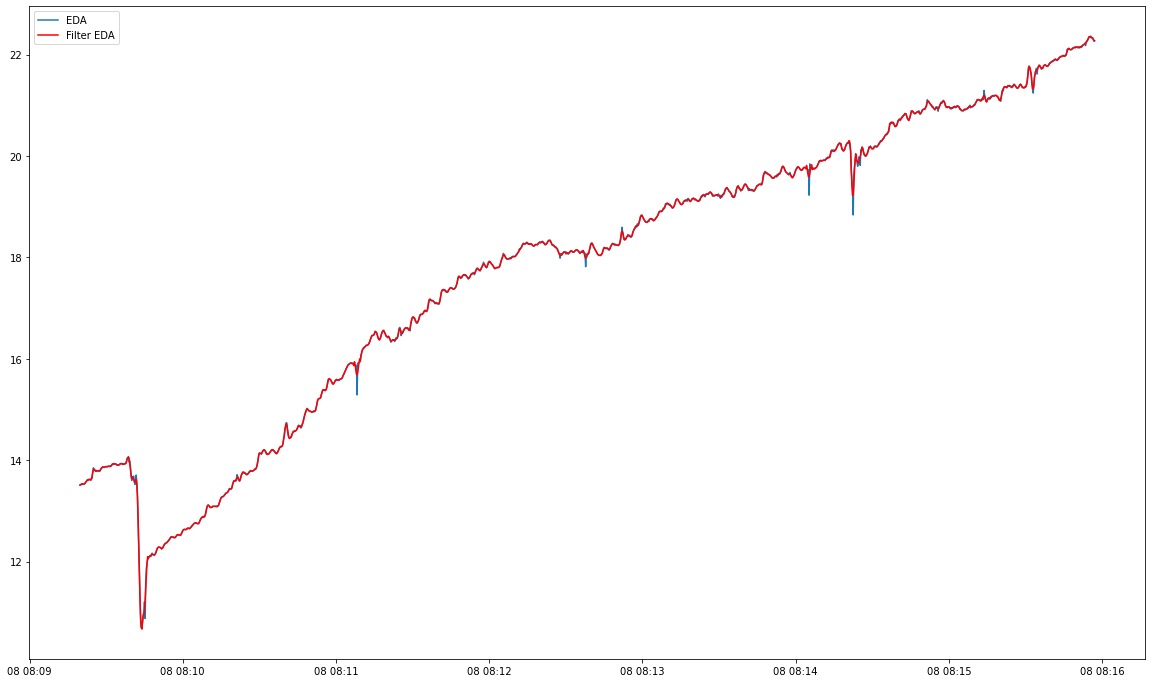

In [13]:
# Filter

from scipy import signal

gsr = dt[(dt["features"] == "E4_Gsr")]

fig = plt.figure(figsize = (20,12))

gsr["EDA_Filtered"] = signal.savgol_filter(gsr["values"], 11, 5) 

plt.plot(gsr.index,gsr["values"])
plt.plot(gsr.index,gsr["EDA_Filtered"], color='red')
plt.legend(['EDA',"Filter EDA"])
plt.show()

In [14]:
# Cheby2 filter

bvp = dt[(dt["features"] == "E4_Bvp")]

filter_Bvp = signal.cheby2(6,18 ,0.1, output='sos')

bvp["BVP_Filtered"] = signal.sosfilt(filter_Bvp, bvp["values"])

C:\Users\HIDDEN~1\AppData\Local\Temp/ipykernel_13080/2227504766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bvp["BVP_Filtered"] = signal.sosfilt(filter_Bvp, bvp["values"])


In [15]:
# 0 - 100 normalization

gsr["EDA_Filtered"] = (gsr["EDA_Filtered"] - gsr["EDA_Filtered"].min()) / (gsr["EDA_Filtered"].max() - gsr["EDA_Filtered"].min()) * 100
gsr

C:\Users\HIDDEN~1\AppData\Local\Temp/ipykernel_13080/2334206992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsr["EDA_Filtered"] = (gsr["EDA_Filtered"] - gsr["EDA_Filtered"].min()) / (gsr["EDA_Filtered"].max() - gsr["EDA_Filtered"].min()) * 100


,features,values,EDA_Filtered
time,,,
2022-04-08 08:09:19.765000105,E4_Gsr,13.50844,24.314137
2022-04-08 08:09:20.015000105,E4_Gsr,13.51612,24.349328
2022-04-08 08:09:20.265000105,E4_Gsr,13.51741,24.449512
2022-04-08 08:09:20.515000105,E4_Gsr,13.54046,24.508403
2022-04-08 08:09:20.765000105,E4_Gsr,13.52637,24.502887
...,...,...,...
2022-04-08 08:15:56.015000105,E4_Gsr,22.32590,99.830072
2022-04-08 08:15:56.265000105,E4_Gsr,22.33231,99.712845
2022-04-08 08:15:56.515000105,E4_Gsr,22.31181,99.518166


In [16]:
# 0 - 100 normalization

bvp["BVP_Filtered"] = (bvp["BVP_Filtered"] - bvp["BVP_Filtered"].min()) / (bvp["BVP_Filtered"].max() - bvp["BVP_Filtered"].min()) * 100
bvp

C:\Users\HIDDEN~1\AppData\Local\Temp/ipykernel_13080/1762672558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bvp["BVP_Filtered"] = (bvp["BVP_Filtered"] - bvp["BVP_Filtered"].min()) / (bvp["BVP_Filtered"].max() - bvp["BVP_Filtered"].min()) * 100


,features,values,BVP_Filtered
time,,,
2022-04-08 08:09:21.166290045,E4_Bvp,36.123960,44.265833
2022-04-08 08:09:21.181920052,E4_Bvp,33.646580,44.235979
2022-04-08 08:09:21.197550058,E4_Bvp,31.193120,44.840489
2022-04-08 08:09:21.213170052,E4_Bvp,28.641600,45.421775
2022-04-08 08:09:21.228800058,E4_Bvp,25.786800,45.855643
...,...,...,...
2022-04-08 08:15:57.700279951,E4_Bvp,-5.250870,43.114393
2022-04-08 08:15:57.715909958,E4_Bvp,-5.734756,43.032860
2022-04-08 08:15:57.747159958,E4_Bvp,-6.726974,42.934346


In [17]:
# EDA TONIC & EDA PHASIC

import neurokit2 as nk
gsr_scr_scl = nk.eda_phasic(gsr["EDA_Filtered"], sampling_rate = 4)
gsr_scr_scl 

,EDA_Tonic,EDA_Phasic
0,24.506575,-0.192438
1,24.566294,-0.216966
2,24.628609,-0.179097
3,24.693505,-0.185103
4,24.760959,-0.258071
...,...,...
1585,99.089354,0.690664
1586,99.100574,0.579752
1587,99.109892,0.395561
1588,99.117472,0.201204


In [18]:
gsr_scr_scl = gsr_scr_scl.set_index(gsr.index)

In [19]:
# Pivot Table

dx = dt.copy()

dx = dx.pivot_table(values='values', index=dx.index, columns='features', aggfunc='first')
dx.head()

features,E4_Bvp,E4_Gsr,E4_Temperature
time,,,
2022-04-08 08:09:19.552720070,NaN,NaN,31.37
2022-04-08 08:09:19.765000105,NaN,13.50844,NaN
2022-04-08 08:09:19.802730083,NaN,NaN,31.37
2022-04-08 08:09:20.015000105,NaN,13.51612,NaN
2022-04-08 08:09:20.052750111,NaN,NaN,31.37


In [20]:
# adding filtered features

dx = dx.join(gsr["EDA_Filtered"])
dx = dx.join(bvp["BVP_Filtered"])
dx = dx.join(gsr_scr_scl)

In [21]:
dx 

,E4_Bvp,E4_Gsr,E4_Temperature,EDA_Filtered,BVP_Filtered,EDA_Tonic,EDA_Phasic
time,,,,,,,
2022-04-08 08:09:19.552720070,NaN,NaN,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:19.765000105,NaN,13.50844,NaN,24.314137,NaN,24.506575,-0.192438
2022-04-08 08:09:19.802730083,NaN,NaN,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:20.015000105,NaN,13.51612,NaN,24.349328,NaN,24.566294,-0.216966
2022-04-08 08:09:20.052750111,NaN,NaN,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-08 08:15:57.700279951,-5.250870,NaN,NaN,NaN,43.114393,NaN,NaN
2022-04-08 08:15:57.715909958,-5.734756,NaN,NaN,NaN,43.032860,NaN,NaN
2022-04-08 08:15:57.747159958,-6.726974,NaN,NaN,NaN,42.934346,NaN,NaN


In [22]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

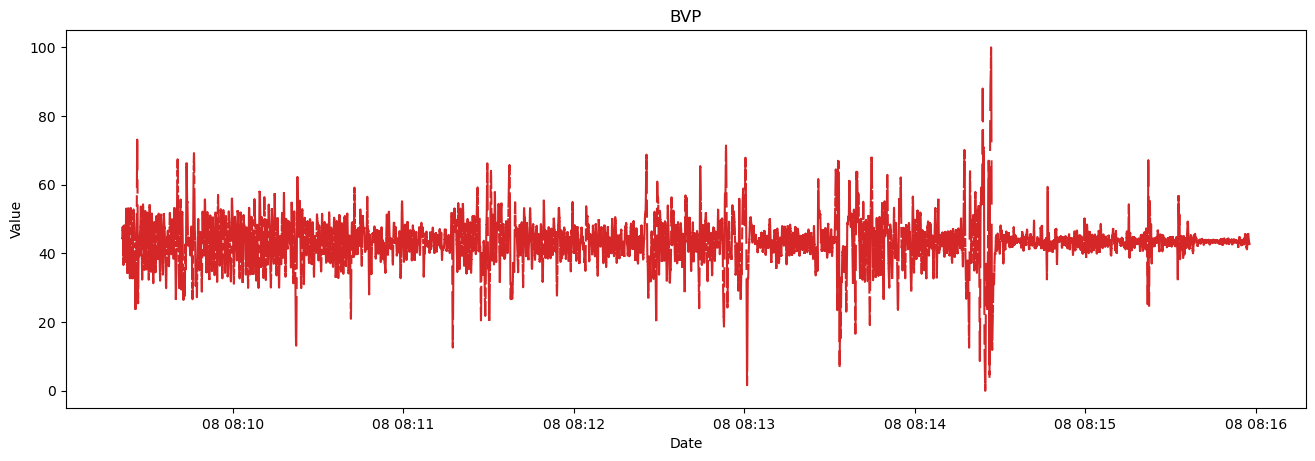

In [23]:
plot_df(dx, x=dx.index, y=dx["BVP_Filtered"], title='BVP')

In [24]:
# Drop unfiltered and non-normalized data

dx.drop(columns = ["E4_Bvp","E4_Gsr"],inplace = True)

In [30]:
# rename E4_Temperature

dx.rename(columns = {dx.columns[0]:'ST'},inplace = True)

In [31]:
dx.head(20)

,ST,EDA_Filtered,BVP_Filtered,EDA_Tonic,EDA_Phasic
time,,,,,
2022-04-08 08:09:19.552720070,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:19.765000105,NaN,24.314137,NaN,24.506575,-0.192438
2022-04-08 08:09:19.802730083,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:20.015000105,NaN,24.349328,NaN,24.566294,-0.216966
2022-04-08 08:09:20.052750111,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:20.265000105,NaN,24.449512,NaN,24.628609,-0.179097
2022-04-08 08:09:20.302759886,31.37,NaN,NaN,NaN,NaN
2022-04-08 08:09:20.515000105,NaN,24.508403,NaN,24.693505,-0.185103
2022-04-08 08:09:20.552769899,31.39,NaN,NaN,NaN,NaN
